In [1]:
# Gideon Mooijen
# 10686290
# g.g.a.mooijen@uva.nl
# Big Data project

In [ ]:
import numpy as np
from sklearn.decomposition import MiniBatchSparsePCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import csv
import time
import warnings

In [2]:
def pca(X,method):
    start_time = time.time()
    if method == 'minb':
        transformer = MiniBatchSparsePCA(n_components=3, batch_size = 10, random_state = 0)
    if method == 'incr':
        transformer = IncrementalPCA(n_components=3, batch_size=10)
    if method == 'regu':
        transformer = PCA(n_components=3,svd_solver='full')
    transformer.fit(X)
    X_transformed = transformer.transform(X)
    calculation_time = time.time() - start_time
    return calculation_time

In [3]:
def execute_all(start,end,stepsize,include_minb,include_incr,include_regu):
    warnings.simplefilter("ignore")
    data_size = start
    sizes, minb, incr, regu = [], [], [], []
    while data_size <= end:
        filename = str(data_size) + 'mb.csv'
        sizes.append(data_size)
        X = pd.read_csv('data/'+filename, sep=',',header=None)
        if include_minb: minb.append(round(pca(X,'minb'),2))
        if include_incr: incr.append(round(pca(X,'incr'),2))
        if include_regu: regu.append(round(pca(X,'regu'),2))
        data_size += stepsize
        plot_methods(sizes,minb,incr,regu)
    print('\n','n*8','\n','FINAL SCORES \t mb \t incr \t regu \n')
    for i in range(0,len(sizes)):
        if include_regu:
            print(str(sizes[i])+'mb.csv\t',minb[i],'\t',incr[i],'\t',regu[i])
        else:
            print(str(sizes[i])+'mb.csv\t',minb[i],'\t',incr[i],'\t')
    plot_methods(sizes,minb,incr,regu)

In [4]:
def plot_methods(sizes,minb,incr,regu):
    df = pd.DataFrame({'x': sizes, 'minibatch': minb, 'incremental': incr})
    if regu != []: df=pd.DataFrame({'x': sizes, 'minibatch': minb, 'incremental': incr, 'regular': regu })
    if minb != []: plt.plot( 'x', 'minibatch', data=df, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=2)
    if incr != []: plt.plot( 'x', 'incremental', data=df, marker='o', markerfacecolor='blue', markersize=4, color='red', linewidth=2)
    if regu != []: plt.plot( 'x', 'regular', data=df, marker='o', markerfacecolor='blue', markersize=4, color='yellow', linewidth=2)
    plt.legend()
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

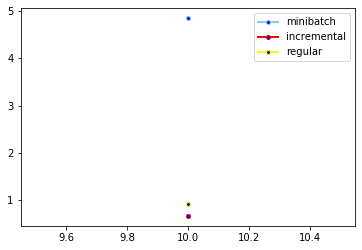

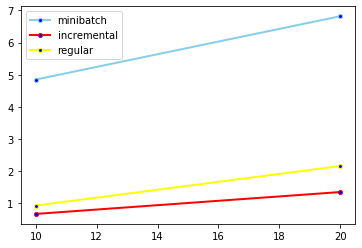

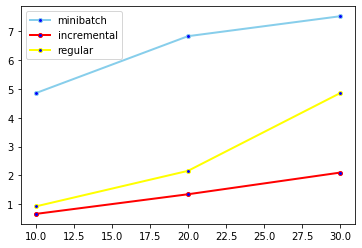

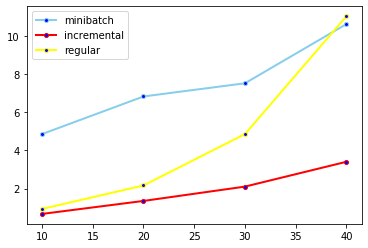

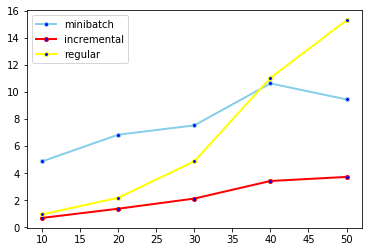

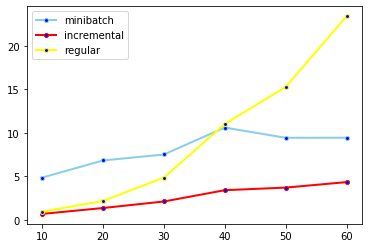

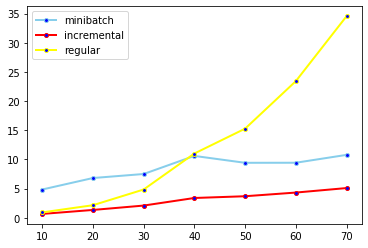

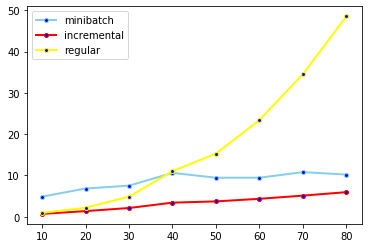

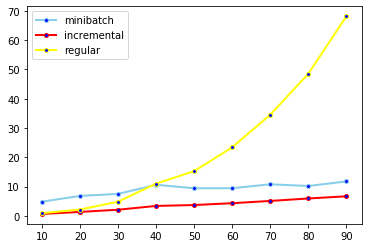

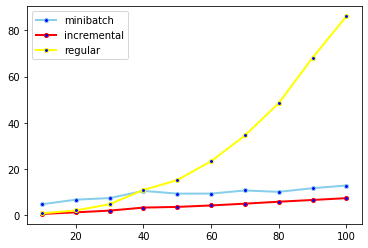


 n*8 
 FINAL SCORES 	 mb 	 incr 	 regu 

10mb.csv	 4.85 	 0.67 	 0.93
20mb.csv	 6.82 	 1.35 	 2.16
30mb.csv	 7.51 	 2.1 	 4.85
40mb.csv	 10.61 	 3.4 	 11.02
50mb.csv	 9.43 	 3.7 	 15.28
60mb.csv	 9.44 	 4.33 	 23.42
70mb.csv	 10.79 	 5.1 	 34.55
80mb.csv	 10.2 	 5.94 	 48.54
90mb.csv	 11.77 	 6.69 	 68.15
100mb.csv	 12.94 	 7.48 	 86.04


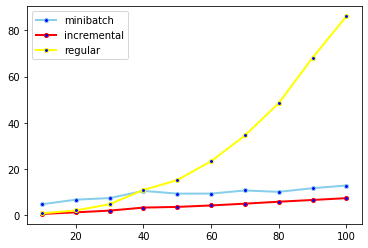

In [7]:
execute_all(10,100,10,include_minb=True,include_incr=True,include_regu=True)

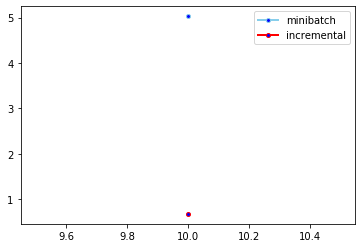

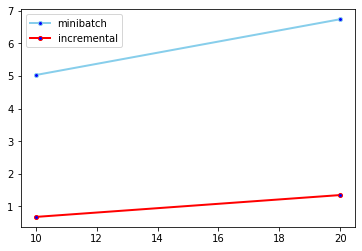

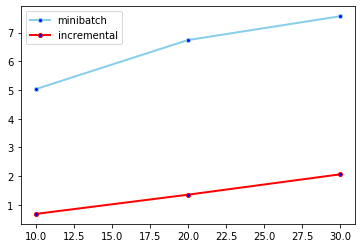

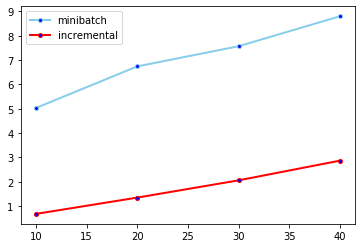

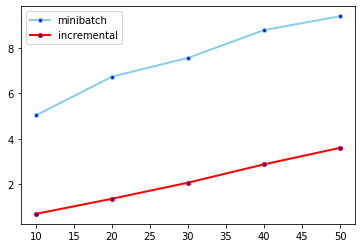

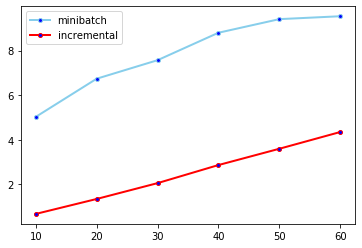

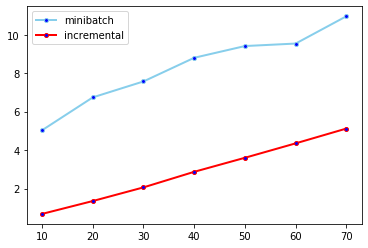

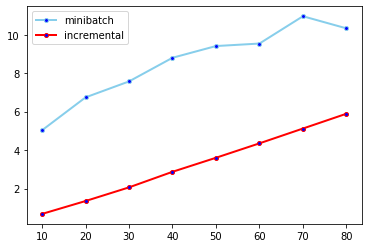

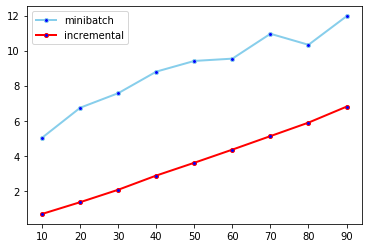

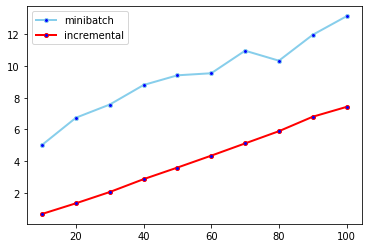

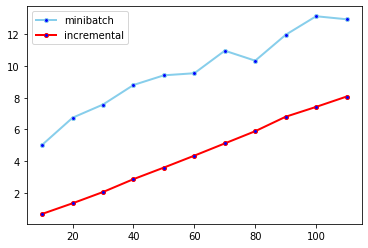

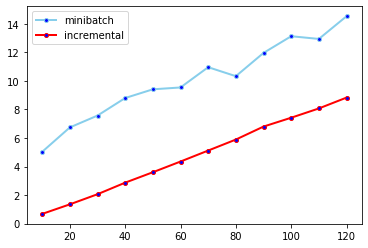

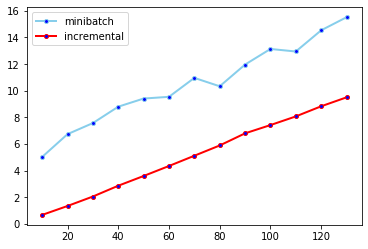

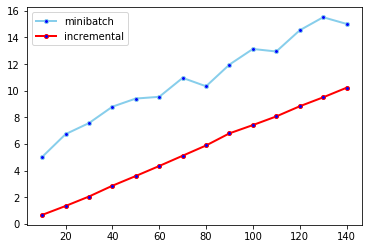

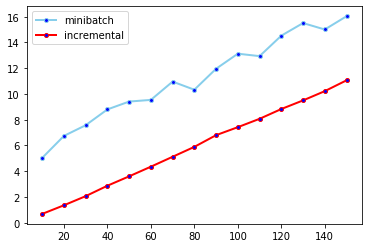

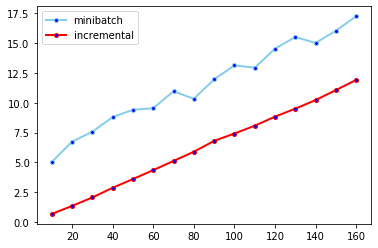

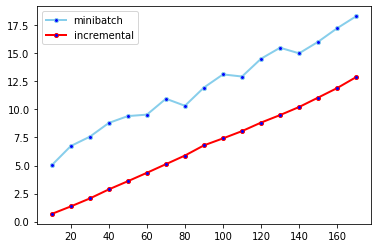

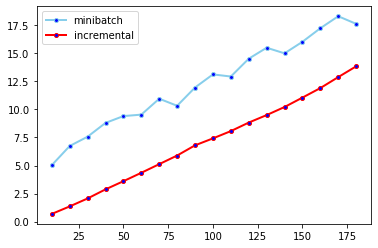

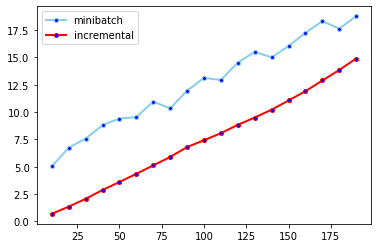

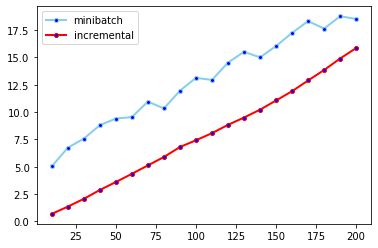

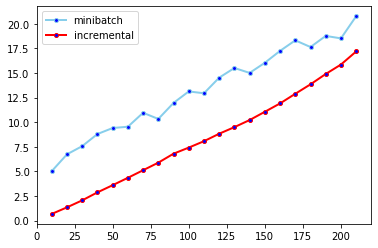

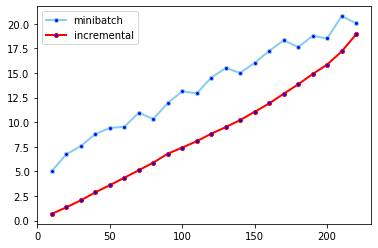

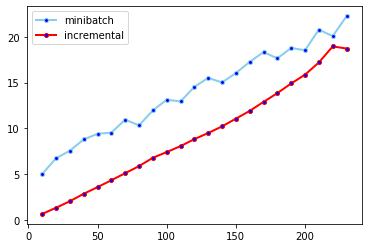

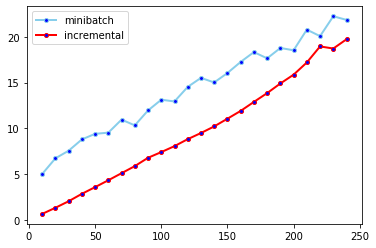

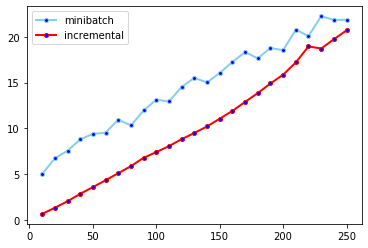

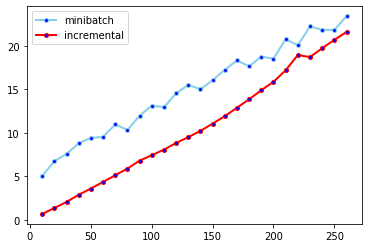

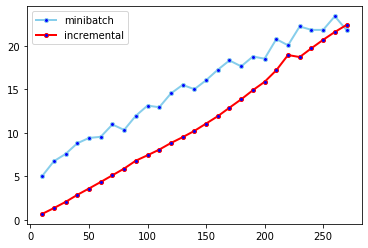

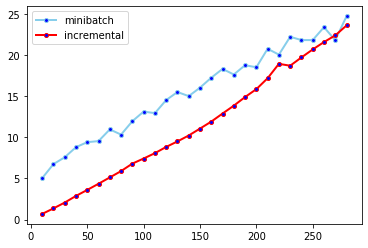

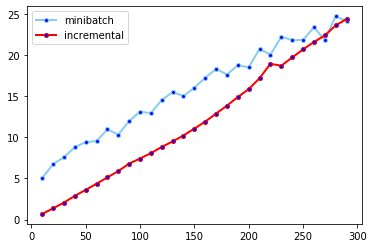

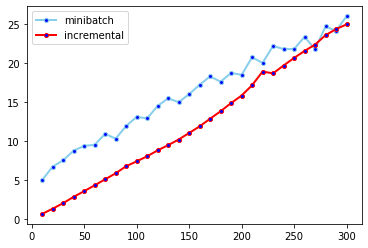

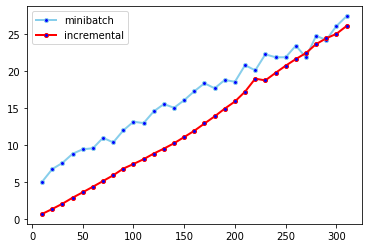

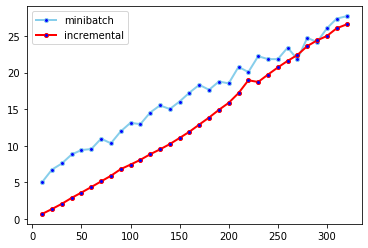


 n*8 
 FINAL SCORES 	 mb 	 incr 	 regu 

10mb.csv	 5.03 	 0.68 	
20mb.csv	 6.74 	 1.35 	
30mb.csv	 7.57 	 2.06 	
40mb.csv	 8.8 	 2.87 	
50mb.csv	 9.41 	 3.6 	
60mb.csv	 9.54 	 4.35 	
70mb.csv	 10.96 	 5.12 	
80mb.csv	 10.33 	 5.89 	
90mb.csv	 11.96 	 6.8 	
100mb.csv	 13.13 	 7.42 	
110mb.csv	 12.94 	 8.07 	
120mb.csv	 14.53 	 8.83 	
130mb.csv	 15.51 	 9.5 	
140mb.csv	 15.01 	 10.22 	
150mb.csv	 16.04 	 11.06 	
160mb.csv	 17.25 	 11.91 	
170mb.csv	 18.32 	 12.89 	
180mb.csv	 17.64 	 13.85 	
190mb.csv	 18.77 	 14.9 	
200mb.csv	 18.52 	 15.86 	
210mb.csv	 20.77 	 17.19 	
220mb.csv	 20.06 	 18.94 	
230mb.csv	 22.23 	 18.71 	
240mb.csv	 21.83 	 19.72 	
250mb.csv	 21.83 	 20.69 	
260mb.csv	 23.4 	 21.59 	
270mb.csv	 21.81 	 22.4 	
280mb.csv	 24.73 	 23.61 	
290mb.csv	 24.17 	 24.39 	
300mb.csv	 26.04 	 24.99 	
310mb.csv	 27.37 	 26.05 	
320mb.csv	 27.69 	 26.57 	


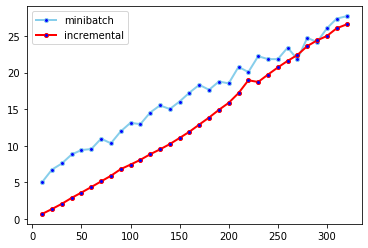

In [10]:
execute_all(10,320,10,include_minb=True,include_incr=True,include_regu=False)

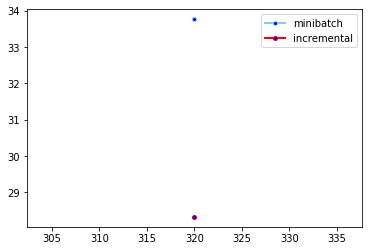

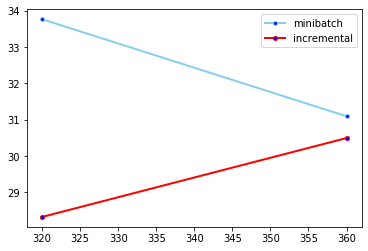

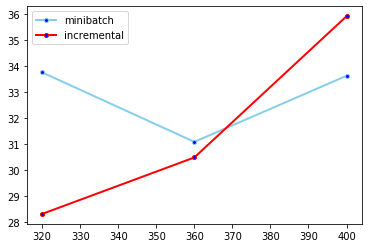

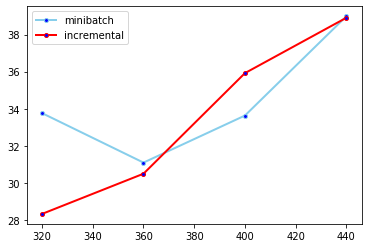

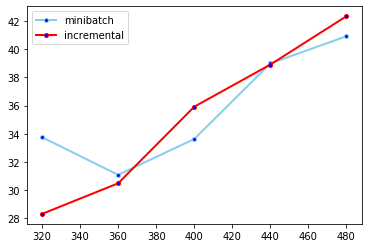

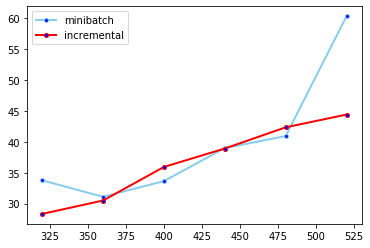

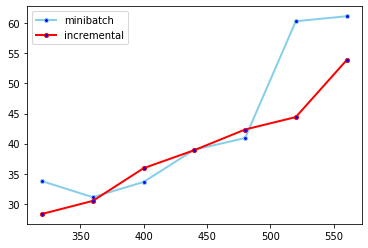

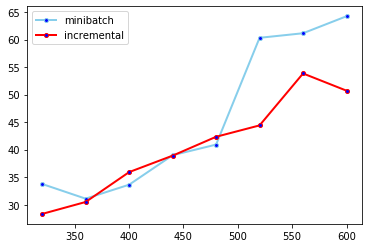

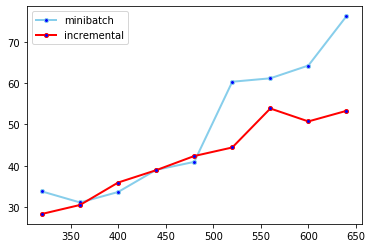


 n*8 
 FINAL SCORES 	 mb 	 incr 	 regu 

320mb.csv	 33.76 	 28.32 	
360mb.csv	 31.09 	 30.49 	
400mb.csv	 33.63 	 35.92 	
440mb.csv	 38.99 	 38.91 	
480mb.csv	 40.92 	 42.34 	
520mb.csv	 60.33 	 44.41 	
560mb.csv	 61.16 	 53.85 	
600mb.csv	 64.25 	 50.72 	
640mb.csv	 76.19 	 53.28 	


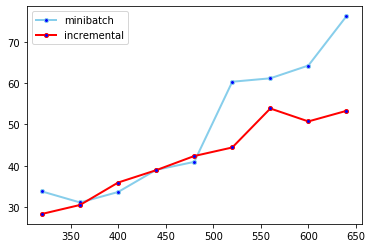

In [5]:
execute_all(320,640,40,include_minb=True,include_incr=True,include_regu=False)